In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from data_module import *

### read data with col names

In [2]:
col_names=['id', 'location', 'type', 'extra'] 
df = pd.read_csv("test_split_v3.txt",sep=" ",names = col_names)

### a sample of a row of dataset

In [3]:
df.iloc[1]

id                                                         31
location    streptococcus-pneumoniae-pneumonia-temporal-ev...
type                                                pneumonia
extra                                                      PA
Name: 1, dtype: object

### open and show a file

In [6]:
img = cv2.imread("data/test/" + df.location[0])

In [7]:
img.shape

(1593, 1800, 3)

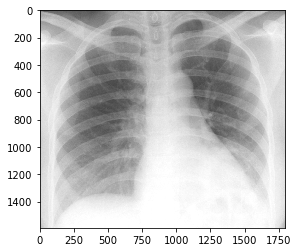

In [8]:
plt.imshow(img)

# Data loader test

In [28]:
generator = BalanceCovidDataset(data_dir="data/",
                                csv_file="test_split_v3.txt",
                                covid_percent=0.1,
                                batch_size=5,
                                is_training=False,
                                augmentation=False,
                                class_weights=[1., 1., 12]) #weights for normal, pneumonia, covid19

#normal+pneumonia:  5  #covid19:  31


In [15]:
len(next(generator))

2

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [34]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

In [30]:
trainX,trainY=next(generator)

In [35]:

opt = Adam(lr=0.001, decay=0.001 / 10)
model.compile(loss="categorical_crossentropy", optimizer=opt)
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	generator,
	verbose=1,
	epochs=10)

[INFO] training head...
  ...
    to  
  ['...']
Train for 1 steps
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.1293
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 1.2351
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.1434
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 1.1812
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.8608
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.9658
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.9242
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.4059
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.7893
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.5958


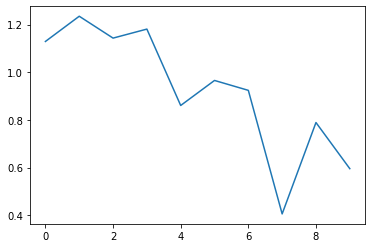

In [38]:
import matplotlib.pyplot as plt
plt.plot(H.history['loss'])

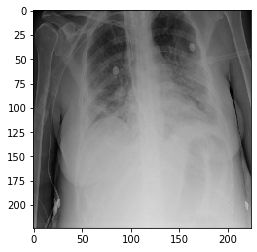

In [25]:
plt.imshow(img_batch[7])